<a href="https://colab.research.google.com/github/lusala-louis/Machine-learning/blob/master/Execution_of_machine_learning_in_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Exploratory Data Analysis**

In [2]:
# Define the number of records in the dataset
num_records = 100

# Generate random book IDs, titles, authors, genres
book_ids = ['B' + str(i).zfill(3) for i in range(1, num_records + 1)]
book_titles = ['Book ' + str(i) for i in range(1, num_records + 1)]
authors = ['Author ' + str(i) for i in range(1, num_records + 1)]
genres = ['Fiction', 'Mystery', 'Science Fiction', 'Romance']

# Generate random publication dates
start_date = pd.to_datetime('2000-01-01')
end_date = pd.to_datetime('2023-12-31')
publication_dates = pd.to_datetime(np.random.choice(pd.date_range(start_date, end_date), num_records))

# Generate random reviews, borrow counts, and request counts
reviews = np.random.choice(['Excellent', 'Good', 'Average', 'Poor'], num_records)
borrow_counts = np.random.randint(0, 50, num_records)
request_counts = np.random.randint(0, 20, num_records)

# Create a DataFrame with the generated data
data = pd.DataFrame({
    'Book ID': book_ids,
    'Book Title': book_titles,
    'Author': authors,
    'Genre': np.random.choice(genres, num_records),
    'Publication Date': publication_dates,
    'Reviews': reviews,
    'Borrow Count': borrow_counts,
    'Request Count': request_counts
})

data.to_csv('Library_books.csv', index =True )

# Print the first few rows of the generated data
print(data.head())


  Book ID Book Title    Author            Genre Publication Date    Reviews  \
0    B001     Book 1  Author 1  Science Fiction       2005-04-26       Poor   
1    B002     Book 2  Author 2          Mystery       2003-03-11  Excellent   
2    B003     Book 3  Author 3          Romance       2013-01-12       Good   
3    B004     Book 4  Author 4          Fiction       2013-05-26  Excellent   
4    B005     Book 5  Author 5  Science Fiction       2020-09-25  Excellent   

   Borrow Count  Request Count  
0            22             17  
1            41              6  
2            19              6  
3            20             13  
4            14              4  


In [3]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

       Borrow Count  Request Count
count    100.000000      100.00000
mean      24.260000        9.93000
std       14.276222        6.00884
min        0.000000        0.00000
25%       12.750000        4.75000
50%       24.000000        9.50000
75%       36.500000       16.00000
max       49.000000       19.00000


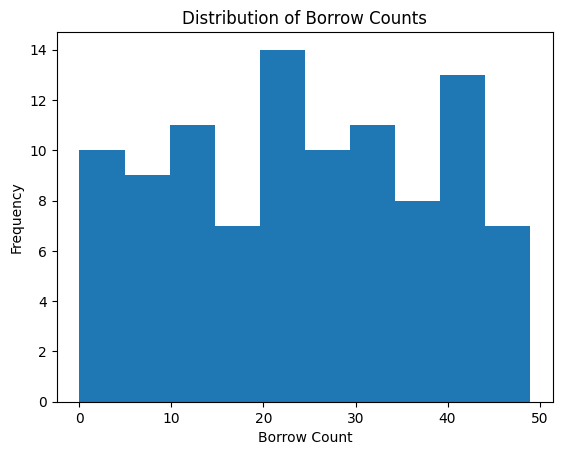

<Figure size 640x480 with 0 Axes>

In [4]:
# Distribution of borrow counts
plt.hist(data['Borrow Count'], bins=10)
plt.xlabel('Borrow Count')
plt.ylabel('Frequency')
plt.title('Distribution of Borrow Counts')
plt.show()

plt.savefig('books_borrowed.png')

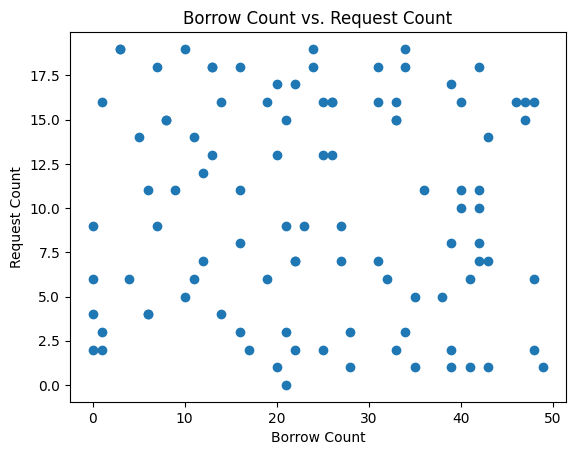

<Figure size 640x480 with 0 Axes>

In [5]:
# Scatter plot of borrow counts vs. request counts
plt.scatter(data['Borrow Count'], data['Request Count'])
plt.xlabel('Borrow Count')
plt.ylabel('Request Count')
plt.title('Borrow Count vs. Request Count')
plt.show()

plt.savefig('borrow_count.png')

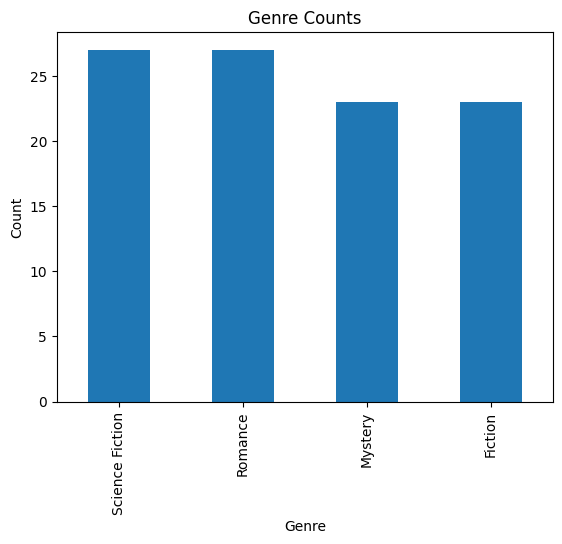

<Figure size 640x480 with 0 Axes>

In [6]:
# Bar plot of genre counts
genre_counts = data['Genre'].value_counts()
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.show()

plt.savefig('genre_count.png')

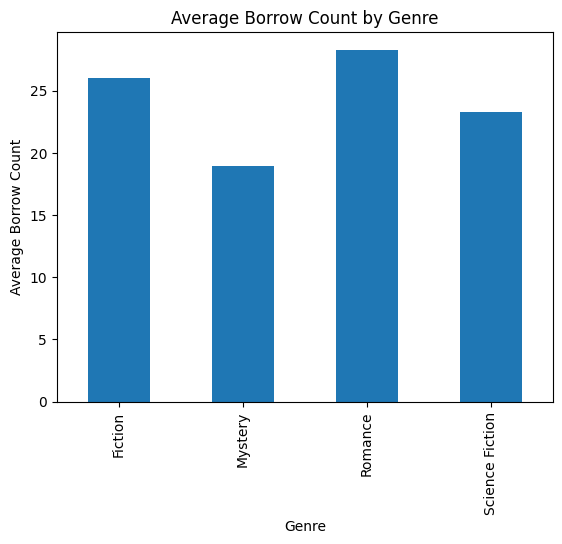

<Figure size 640x480 with 0 Axes>

In [7]:
# Grouping by genre and calculating average borrow count
genre_borrow_avg = data.groupby('Genre')['Borrow Count'].mean()
genre_borrow_avg.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Borrow Count')
plt.title('Average Borrow Count by Genre')
plt.show()

plt.savefig('avg_borrow_count.png')

In [21]:
# Generate dates for a year
start_date = pd.Timestamp('2021-01-01')
end_date = pd.Timestamp('2021-12-31')
dates = pd.date_range(start_date, end_date, freq='D')

# Generate random number of books borrowed per day
num_borrowed = np.random.randint(0, 10, size=len(dates))

# Create a DataFrame with the generated data
data1 = pd.DataFrame({'Date/Time': dates, 'Books Borrowed': num_borrowed})

# Print the first few rows of the generated data
print(data1.head())

   Date/Time  Books Borrowed
0 2021-01-01               7
1 2021-01-02               5
2 2021-01-03               9
3 2021-01-04               6
4 2021-01-05               9


**Analysis of Book Borrowing patterns**

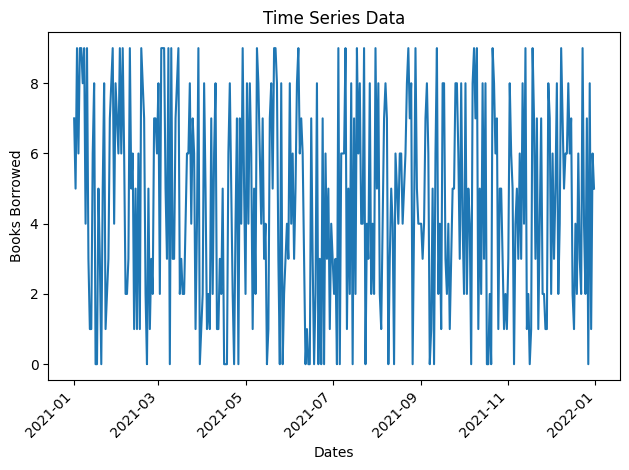

<Figure size 640x480 with 0 Axes>

In [22]:
data1.set_index('Date/Time', inplace=True)

plt.plot(data1.index, data1['Books Borrowed'])
plt.xlabel('Dates')
plt.ylabel('Books Borrowed')
plt.title('Time Series Data')

# Set the desired tick frequency
date_range = pd.date_range(start=data1.index.min(), end=data1.index.max(), freq='D')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels by 45 degrees, align right

plt.tight_layout()  # Adjust layout if necessary
plt.show()

plt.savefig('books_read.png', dpi = 300)

**Machine Learning**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Load the generated dataset
data = pd.read_csv('Library_books.csv')

In [14]:
# Handling missing values (if any)
data = data.dropna()

# Encoding categorical variables
data_encoded = pd.get_dummies(data, columns=['Genre'])

# Perform one-hot encoding on the 'BookID' column
data_encoded = pd.get_dummies(data, columns=['Book ID', 'Book Title', 'Author', 'Reviews','Publication Date'], drop_first=True)

In [15]:
# # Splitting the dataset into features and target variable
X = data_encoded.drop(['Borrow Count'], axis=1)
y = data_encoded['Borrow Count']

# Scaling numerical features
numerical_features = ['Request Count']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80, 402)
X_test shape: (20, 402)
y_train shape: (80,)
y_test shape: (20,)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
# Define the relevant features and drop unnecessary columns
selected_features = ['Request Count']  #, 'Genre_Fiction', 'Genre_Mystery', 'Genre_Science Fiction']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Print the selected feature names
print("Selected Features:", selected_features)

# Print the shape of the selected datasets
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

Selected Features: ['Request Count']
X_train_selected shape: (80, 1)
X_test_selected shape: (20, 1)


In [18]:
# Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train_selected, y_train)
linear_pred = linear_regression.predict(X_test_selected)

# Evaluation
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)

print("Linear Regression - MSE: {:.2f}, MAE: {:.2f}".format(linear_mse, linear_mae))

Linear Regression - MSE: 211.34, MAE: 11.98


In [19]:
# Decision Tree Regressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_selected, y_train)
dt_pred = decision_tree.predict(X_test_selected)

#Evaluation
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)

print("Decision Tree Regressor - MSE: {:.2f}, MAE: {:.2f}".format(dt_mse, dt_mae))

Decision Tree Regressor - MSE: 202.87, MAE: 11.25
